In [279]:
from __future__ import print_function 
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Lambda, TimeDistributed
from keras.layers import Conv1D, MaxPooling1D, Embedding, Activation, Reshape, merge, Merge
from keras.layers import SimpleRNN, GRU, LSTM, Bidirectional
from keras.engine.topology import Layer
from keras import initializers

import keras.backend as K

## Load the dataset

In [97]:
f = np.load('data_and_embedding100.npz')

In [98]:
num_words = int(f['num_words'])
embedding_dim = int(f['embedding_dim'])
max_sequence_length = int(f['max_sequence_length'])
max_sentence_length = int(f['max_sentence_length'])

data = f['data']
labels = f['labels']

embedding_matrix = f['embedding_matrix']
sequences_sentences = f['sequences_sentences']

In [204]:
print(type(data), type(labels), type(sequences_sentences))
print(len(data), len(labels), len(sequences_sentences))
print(type(data[0]), type(labels[0]), type(sequences_sentences[0]), type(sequences_sentences[0][0]))
print(data[0].shape, labels[0].shape, len(sequences_sentences[0][0]))
print(data[0], labels[0])
print()
for i in range(len(sequences_sentences[0])):
    print(sequences_sentences[0][i])
    print()

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
389877 389877 389877
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'list'> <class 'list'>
(100,) (6,) 6
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  127  327   11   26 4992    1  750   19    2  327    9   22  107    3 1383
    8    5   34  107   45    5 1443   73    1  496    3  175    2  107    6
   37 6682   10 1598    9  170    1    7   15   40  532    4  281   71 9483
    1   13   38  261 3957  313   14    1    3  469   14  661    1   80   39
  281   60   29   36  132   51    9    2  255    1] [ 0.  0.  0.  0.  1.  0.]

[20, 30, 194, 310, 48, 198]

[368, 188, 6, 33, 19, 13, 33, 193, 149, 104, 38]

[357, 250, 11, 628, 1687]

[618, 102, 421, 9, 48, 892, 6, 549, 2079, 1113]



In [280]:
word_length_dict = {}

for doc in sequences_sentences:
    for sent in doc:
        if len(sent) not in word_length_dict:
            word_length_dict[len(sent)] = 1
        else:
            word_length_dict[len(sent)] += 1
            
for key in sorted(word_length_dict):
    print(key, word_length_dict[key])
    

0 4099
1 29310
2 39578
3 48465
4 72520
5 82319
6 84418
7 93671
8 91412
9 93266
10 87698
11 89893
12 91193
13 81268
14 72828
15 70108
16 60519
17 59307
18 50508
19 44896
20 42568
21 36977
22 33430
23 27968
24 27430
25 22156
26 19342
27 16612
28 14711
29 12180
30 12040
31 9203
32 8334
33 7423
34 6337
35 6010
36 4853
37 4817
38 3960
39 3439
40 3249
41 2509
42 2023
43 2070
44 2092
45 1579
46 1798
47 1499
48 1043
49 1395
50 819
51 546
52 589
53 591
54 665
55 487
56 675
57 537
58 389
59 440
60 403
61 214
62 305
63 213
64 464
65 116
66 270
67 151
68 131
69 48
70 232
71 127
72 96
73 191
74 123
75 61
76 125
77 46
78 97
79 8
80 24
81 68
82 81
83 154
84 222
85 88
86 22
87 168
88 4
89 110
90 20
91 11
92 2
93 10
94 13
95 29
96 7
97 4
98 10
99 13
100 232
101 1
102 6
103 1
104 1
106 1
107 10
108 5
109 1
110 9
112 5
113 12
115 1
116 1
117 52
118 2
119 4
120 2
121 1
123 14
124 5
125 1
126 1
127 1
132 1
140 1
146 1
148 1
152 1
153 1
155 1
156 5
160 2
162 5
190 7
201 1
206 1
256 1


(array([ 101.,    7.,    2.,    2.,    2.,    2.,    1.,    2.,    1.,
           2.,    2.,    0.,    2.,    0.,    1.,    2.,    0.,    2.,
           2.,    5.]),
 array([  1.00000000e+00,   4.68450000e+03,   9.36800000e+03,
          1.40515000e+04,   1.87350000e+04,   2.34185000e+04,
          2.81020000e+04,   3.27855000e+04,   3.74690000e+04,
          4.21525000e+04,   4.68360000e+04,   5.15195000e+04,
          5.62030000e+04,   6.08865000e+04,   6.55700000e+04,
          7.02535000e+04,   7.49370000e+04,   7.96205000e+04,
          8.43040000e+04,   8.89875000e+04,   9.36710000e+04]),
 <a list of 20 Patch objects>)

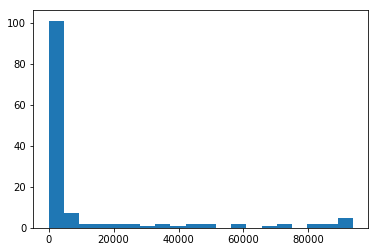

In [282]:
plt.hist(list(word_length_dict.values()), 20)
        
# a suitable maximum number of words in each sentence 80-100

In [111]:
sentence_length_dict = {}

for sent in sequences_sentences:
#     for sent in doc:
    if len(sent) not in sentence_length_dict:
        sentence_length_dict[len(sent)] = 1
    else:
        sentence_length_dict[len(sent)] += 1
            
for key in sorted(sentence_length_dict):
    print(key, sentence_length_dict[key])
    
    
# a suitable maximum number of sentences in each review 30-40

1 34130
2 70960
3 87480
4 61635
5 45395
6 28638
7 18575
8 12369
9 7664
10 6343
11 4730
12 2533
13 2157
14 1444
15 1045
16 927
17 432
18 656
19 455
20 233
21 259
22 221
23 236
24 249
25 120
26 273
27 88
28 42
29 80
30 25
31 12
32 125
33 57
34 38
35 15
36 55
37 13
39 6
40 4
41 1
42 3
44 43
45 7
46 1
48 1
49 10
50 2
51 12
53 1
54 25
58 33
59 1
72 7
107 11


(array([ 43.,   3.,   1.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  1.00000000e+00,   4.37495000e+03,   8.74890000e+03,
          1.31228500e+04,   1.74968000e+04,   2.18707500e+04,
          2.62447000e+04,   3.06186500e+04,   3.49926000e+04,
          3.93665500e+04,   4.37405000e+04,   4.81144500e+04,
          5.24884000e+04,   5.68623500e+04,   6.12363000e+04,
          6.56102500e+04,   6.99842000e+04,   7.43581500e+04,
          7.87321000e+04,   8.31060500e+04,   8.74800000e+04]),
 <a list of 20 Patch objects>)

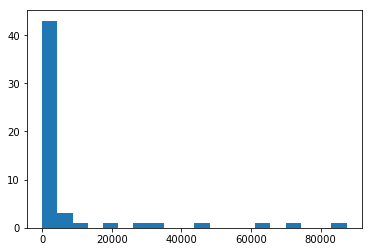

In [283]:
plt.hist(list(sentence_length_dict.values()), 20)


In [128]:
validation_split = 0.2 
epochs = 60

In [5]:
# indices = np.arange(data.shape[0])
# np.random.shuffle(indices)
# data = data[indices]
# labels = labels[indices]
# num_validation_samples = int(validation_split * data.shape[0])

# x_train = data[:-num_validation_samples]
# y_train = labels[:-num_validation_samples]
# x_val = data[-num_validation_samples:]
# y_val = labels[-num_validation_samples:]

## Hierarchical Attention

### Reconstruct dataset

In [113]:
max_sequence_length = 80
max_sentence_length = 30

In [217]:
def pad_seq(sent, num):
    if len(sent) >= num:
        return sent[:num]
    else:
        return [0]*(num-len(sent)) + sent

def pad_sent(sent_list, num):
    if len(sent_list) >= num:
        return sent_list[:num]
    else:
        zero_sent = [0]*len(sent_list[0])
        return [zero_sent for i in range(num-len(sent_list))] + sent_list

In [119]:
print(pad_seq([1,2,3,4], 9))
print(pad_sent([[1,1,1], [0,0,2]], 4))

[0, 0, 0, 0, 0, 1, 2, 3, 4]
[[0, 0, 0], [0, 0, 0], [1, 1, 1], [0, 0, 2]]


In [218]:
sent_padded_sequences = [[pad_seq(sent, max_sequence_length) for sent in sent_list] for sent_list in sequences_sentences]

In [219]:
print(len(sent_padded_sequences))
print(len(sent_padded_sequences[0]))
print(len(sent_padded_sequences[0][0]))
print(type(sent_padded_sequences))

389877
4
80
<class 'list'>


In [220]:
data3d = [pad_sent(sent_list, max_sentence_length) for sent_list in sent_padded_sequences]

In [221]:
print(type(data3d))

for i in range(len(data3d)):
    if len(data3d[0]) != max_sentence_length:
        print("kk")
    
for i in range(len(data3d)):
    for j in range(len(data3d[i])):
        if len(data3d[i][j]) != max_sequence_length:
            print("pp")

<class 'list'>


In [222]:
data3d_final = np.array(data3d)

In [223]:
print(type(data3d_final))
print(type(data3d_final[0]))
print(type(data3d_final[0][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [224]:
print(data3d_final.shape)
print(data3d_final[0].shape)
print(data3d_final[0][0].shape)

print(data3d_final[1].shape)
print(data3d_final[1][1].shape)

print(data3d_final[2].shape)
print(data3d_final[2][2].shape)

(389877, 30, 80)
(30, 80)
(80,)
(30, 80)
(80,)
(30, 80)
(80,)


In [225]:
indices = np.arange(data3d_final.shape[0])
np.random.shuffle(indices)
data3d_final = data3d_final[indices]
labels = labels[indices]
num_validation_samples = int(validation_split * data3d_final.shape[0])

x_train = data3d_final[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data3d_final[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

In [226]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

print(x_train[0].shape)
print(x_train[0][0].shape)

(311902, 30, 80)
(311902, 6)
(77975, 30, 80)
(77975, 6)
(30, 80)
(80,)


### Build the model 

In [227]:
embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_sequence_length,
                            trainable=False)

In [274]:
class AttLayer(Layer):
    def __init__(self, output_dim=None, **kwargs):
        self.output_dim = output_dim
        super(AttLayer, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel',
                                     shape=(input_shape[-1], 1),
                                     initializer='normal',
                                     trainable=True)
        print(self.kernel.get_shape())

        super(AttLayer, self).build(input_shape)
        
    def call(self, x, mask=None):
        eij = K.dot(x, self.kernel)
        print(eij.get_shape(), 'eij')
        
        ai = K.exp(eij)
        weights = ai/tf.expand_dims(K.sum(ai, axis=1), -1) #ai/K.sum(ai, axis=1).dimshuffle(0, 'x')
        print(weights.get_shape(), 'weights')
        
        weighted_input = x*weights #tf.expand_dims(weights, -1) #x*weights.dimshuffle(0, 1, 'x')
        print(weighted_input.get_shape(), 'weighted_input')
        return tf.reduce_sum(weighted_input, axis=1)
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [277]:
sentence_input = Input(shape=(max_sequence_length, ), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
gru_word = Bidirectional(GRU(50, return_sequences=True))(embedded_sequences)
dense_word = TimeDistributed((Dense(100)))(gru_word)
tanh_word = TimeDistributed(Activation('tanh'))(dense_word)
att_word = AttLayer()(tanh_word)
sentEncoder = Model(sentence_input, att_word)

review_input = Input(shape=(max_sentence_length, max_sequence_length), dtype='int32')
review_encoder = TimeDistributed(sentEncoder)(review_input)
gru_sent = Bidirectional(GRU(50, return_sequences=True))(review_encoder)
dense_sent = TimeDistributed(Dense(100))(gru_sent)
tanh_sent = TimeDistributed(Activation('tanh'))(dense_sent)
att_sent = AttLayer()(tanh_sent)
preds = Dense(6, activation='softmax')(att_sent)
model_attention = Model(review_input, preds)

(100, 1)
(?, 80, 1) eij
(?, 80, 1) weights
(?, 80, 100) weighted_input
(?, ?, 1) eij
(?, ?, 1) weights
(?, ?, 100) weighted_input
(100, 1)
(?, 30, 1) eij
(?, 30, 1) weights
(?, 30, 100) weighted_input


In [278]:
sentEncoder.summary()
model_attention.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_66 (InputLayer)        (None, 80)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 80, 100)           2000000   
_________________________________________________________________
bidirectional_57 (Bidirectio (None, 80, 100)           45300     
_________________________________________________________________
time_distributed_136 (TimeDi (None, 80, 100)           10100     
_________________________________________________________________
time_distributed_137 (TimeDi (None, 80, 100)           0         
_________________________________________________________________
att_layer_39 (AttLayer)      (None, 100)               100       
Total params: 2,055,500.0
Trainable params: 55,500.0
Non-trainable params: 2,000,000.0
_______________________________________________________

### Train the model

In [270]:
model_attention.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [271]:
import time 
start_time = time.time()

model_attention.fit(x_train, y_train,
          batch_size=128,
          epochs=epochs,
          validation_data=(x_val, y_val))

print("Training time: ", time.time() - start_time)

Train on 311902 samples, validate on 77975 samples
Epoch 1/60
 16000/311902 [>.............................] - ETA: 32960s - loss: 1.1020 - acc: 0.6577 

KeyboardInterrupt: 

### Save the model 

In [ ]:
model_conv_rnn.save('models/Attention.h5')